# Week 04 Exercises: Analysis
**INST447: Data Sources and Manipulation**

These exercises are taken from the following book:
    Roy Jafari. Hands-On Data Preprocessing in Python. Packt Publishing, 2022.


## Chapter 06: Prediction

Chapter 06 covers predictive modeling using forecasting, linear regression, and multilayer perceptrons (MLP) models. These chapters do not go deep enough into the topic to truly understand what is going on. There are many details that are missing (just think about how long you talked about linear regression in INST314). The goal is to have an idea of what will happen to the datesets that we are preparing for analysis. It also turns out that a great way to identify problems with a dataset is to try to answer questions using it.

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipywidgets import interact, widgets

### Exercise 2
2. In this exercise, we will be using ToyotaCorolla_preprocessed.csv. This dataset has the following columns: Age, Milage_KM, Quarterly_Tax, Weight, 	Fuel_Type_CNG, Fuel_Type_Diesel, Fuel_Type_Petrol, and Price. Each data object in this dataset is a used Toyota Corolla car. We would like to use this dataset to predict the price of used Toyota Corolla cars. 

a. Read the data into the pandas DataFrame car_df

In [265]:
car_df = pd.read_csv("ToyotaCorolla_preprocessed.csv")
car_df.head()

,Age,Milage_KM,Quarterly_Tax,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Price
0,23,46986,210,1165,0,1,0,13500
1,23,72937,210,1165,0,1,0,13750
2,24,41711,210,1165,0,1,0,13950
3,26,48000,210,1165,0,1,0,14950
4,30,38500,210,1170,0,1,0,13750


b. Use the skills you picked up in the previous chapter to come up with data visualizations that show the relationship between the attribute price and the rest of the attributes.

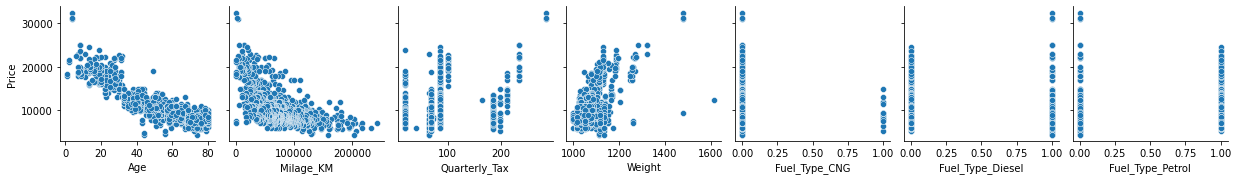

In [266]:
sns.pairplot(car_df, y_vars=['Price'],
                  x_vars=['Age', 'Milage_KM', 'Quarterly_Tax','Weight','Fuel_Type_CNG', 
                          'Fuel_Type_Diesel','Fuel_Type_Petrol']
            )

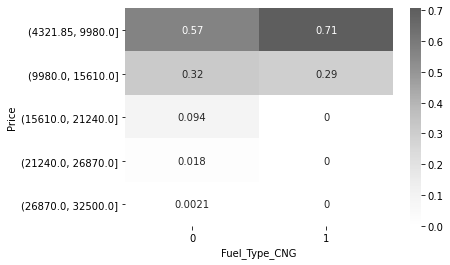

In [267]:
disc_price = pd.cut(car_df.Price,bins=5)
cont_tbl = pd.crosstab(disc_price ,car_df['Fuel_Type_CNG'])
prob_tbl = cont_tbl/cont_tbl.sum()
sns.heatmap(prob_tbl, annot=True, center=0.5,cmap="Greys")
plt.show()

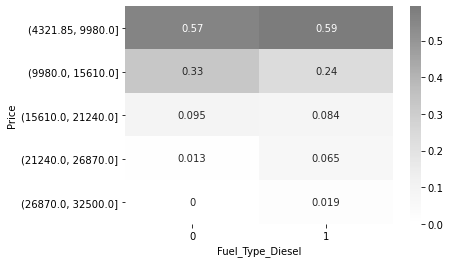

In [268]:
disc_price = pd.cut(car_df.Price,bins=5)
cont_tbl = pd.crosstab(disc_price ,car_df['Fuel_Type_Diesel'])
prob_tbl = cont_tbl/cont_tbl.sum()
sns.heatmap(prob_tbl, annot=True, center=0.5,cmap="Greys")
plt.show()

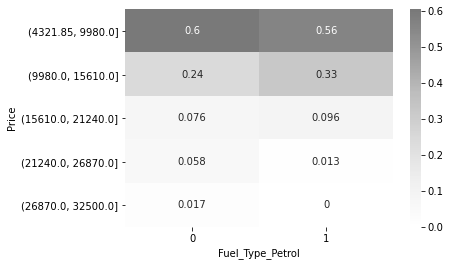

In [269]:
disc_price = pd.cut(car_df.Price,bins=5)
cont_tbl = pd.crosstab(disc_price ,car_df['Fuel_Type_Petrol'])
prob_tbl = cont_tbl/cont_tbl.sum()
sns.heatmap(prob_tbl, annot=True, center=0.5,cmap="Greys")
plt.show()

c. Use the visuals in b, to describe the relationship each of the attributes has with the attribute price.

price and age have a negative and strong relationship (price goes down as age goes up)
price and milage_KM has also has a negative reltionship but this one is not as linear. In general price goes down as milage increases but at low milage there is a weak relationship.
Fuel types don't show a relationship with price but CNG price range is the lowest compared to diesel and petrol. Diesel cars have higher price range than petrol type cars and CNG cars.
Weight and price have some positive relationship.
Price and Quarterly tax show a weak positive correlation.


d. Create the correlation matrix for all the attributes, and report the correlation values for the relationship that you investigated in b and c.

In [270]:
matrix = car_df.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
                       Age  Milage_KM  Quarterly_Tax    Weight  Fuel_Type_CNG  \
Age               1.000000   0.505222      -0.198211 -0.470149       0.002464   
Milage_KM         0.505222   1.000000       0.278852 -0.028181       0.144240   
Quarterly_Tax    -0.198211   0.278852       1.000000  0.626085       0.233774   
Weight           -0.470149  -0.028181       0.626085  1.000000       0.052727   
Fuel_Type_CNG     0.002464   0.144240       0.233774  0.052727       1.000000   
Fuel_Type_Diesel -0.097541   0.403745       0.792706  0.568043      -0.038102   
Fuel_Type_Petrol  0.092396  -0.433893      -0.835435 -0.560423      -0.296704   
Price            -0.876539  -0.569721       0.219021  0.581125      -0.039603   

                  Fuel_Type_Diesel  Fuel_Type_Petrol     Price  
Age                      -0.097541          0.092396 -0.876539  
Milage_KM                 0.403745         -0.433893 -0.569721  
Quarterly_Tax             0.792706         -0.8354

Price and age has a strong negative correlation (-0.876539)
Price and milage has a negative relationship not as stong (-0.569721) 
Price and fuel types don't have a correlation (-0.039, 0.0539,-0.038)
Price and weight have some positive correlation (0.58)
Price and quarterly tax has a weak positive correlation (0.219)

e. Did the visual investigations you performed in b and c was confirmed in d. For what types of attributes the conclusions for c were not confirmed in d? 

Price and age has a strong negative correlation  seen in the scatter plot as well.
Price and milage has a negative relationship not as stong seen in the scatter plot as well.
Price and fuel types don't have a correlation in both scatter plot and correlation matrix (very low values)
Quarterly tax and weight relationship to price seems to be not confirmed in d.

f. Perform a linear regression to predict the attribute price. Use all the attributes that you detect they had a meaningful relationship with the attribute price as independent attributes. Predict the price of a car with the following specifications: Age: 74 months, Milage_KM: 124057, Quarterly_Tax: 69, and Weight: 1050. The car fuel type is diesel.

In [271]:
from sklearn.linear_model import LinearRegression

X = ['Age','Milage_KM', 'Quarterly_Tax','Weight','Fuel_Type_Diesel', 'Fuel_Type_Petrol','Fuel_Type_CNG']
y = 'Price'
data_X = car_df[X]
data_y = car_df[y]

lm = LinearRegression()
lm.fit(data_X, data_y)
                
print('intercept (b0) ', lm.intercept_)
coef_names = ['b1','b2','b3','b4','b5','b6','b7']
print(pd.DataFrame({'Predictor': data_X.columns,
'coefficient Name':coef_names,
'coefficient Value': lm.coef_}))

newData = pd.DataFrame({'Age':74,'Milage_KM':124057,'Quarterly_Tax':69, 'Weight':1050,'Fuel_Type_Diesel':1,
                       'Fuel_Type_Petrol':0,'Fuel_Type_CNG':0},index=[0])
lm.predict(newData)

intercept (b0)  -8425.210277453378
          Predictor coefficient Name  coefficient Value
0               Age               b1        -122.061844
1         Milage_KM               b2          -0.017007
2     Quarterly_Tax               b3          12.891991
3            Weight               b4          22.928677
4  Fuel_Type_Diesel               b5       -1076.200403
5  Fuel_Type_Petrol               b6        1773.667771
6     Fuel_Type_CNG               b7        -697.467368


array([4320.78841532])

g. Implement an MLP algorithm to predict the attribute price. Use all the attributes that you used in f and predict the price of the same new car presented in f. Use (5,10) network structure (hidden_layer_sizes), and set the max_iter as 500. 

In [272]:
from sklearn.neural_network import MLPRegressor

X = ['Age','Milage_KM', 'Quarterly_Tax','Weight','Fuel_Type_Diesel', 'Fuel_Type_Petrol','Fuel_Type_CNG']
y = 'Price'
data_X = car_df[X]
data_y = car_df[y]

mlp = MLPRegressor(hidden_layer_sizes=(5,10), max_iter=500)
mlp.fit(data_X, data_y)
    
mlp.predict(newData)

array([7753.22088125])

h.	The actual price of the new car presented under f is 7950. Report which algorithm performed a better prediction. 

MLP generates different nunmbers in each run but it generated numbers between 6000 and 7900 for me. Overall MLP performed better as it predicted closer to the actual price. (4320 in linear regression versus 6000-7900 n MLP).

## Chapter 07: Classification

In Chapter 06 we had a high-level overview of predicting numerical values. Chapter 07 covers classification or the prediction of categorical values. 

This is one of the hottest topics in machine learning and data science. This chapter is meant to give you an idea of what the goals are and what some common approaches are, but we will not cover any of these techniques in depth.

### Excercise 3

For this exercise, we are going to use the Customer Churn.csv. This dataset is randomly collected from an Iranian telecom company’s database over a period of 12 months. A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attributes that are in this dataset are listed below:
    
    Call Failures: number of call failures
    Complains: binary (0: No complaint, 1: complaint)
    Subscription Length: total months of subscription
    Seconds of Use: total seconds of calls
    Frequency of use: total number of calls
    Frequency of SMS: total number of text messages
    Distinct Called Numbers: total number of distinct phone calls
    Status: binary (1: active, 0: non-active)
    Churn: binary (1: churn, 0: non-churn) - Class label

All of the attributes except for attribute churn are the aggregated data of the first 9 months. The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap.

Using the above data, we would like to use this dataset to predict if the following customer will churn in three months. Call Failures: 8, Complains: 1, Subscription Length: 40, Seconds of Use: 4472, Frequency of use: 70, 
Frequency of SMS: 100, 	Distinct Called Numbers: 25, Status: 1. 

To do this, perform the following steps.

a. Read the data into the pandas DataFrame customer_df.

In [273]:
customer_df = pd.read_csv("Customer Churn.csv")
customer_df.head()

,Call Failure,Complains,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Status,Churn
0,8,0,38,4370,71,5,17,1,0
1,0,0,39,318,5,7,4,0,0
2,10,0,37,2453,60,359,24,1,0
3,10,0,38,4198,66,1,35,1,0
4,3,0,38,2393,58,2,33,1,0


In [274]:
customer_df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Seconds of Use',
       'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers',
       'Status', 'Churn'],
      dtype='object')

b. Use the skills you picked up in chapter 5 Data Visualization to come up with data visualizations that show the relationship between the attribute churn and the rest of the attributes.

Using a heatmap for the visulas. Numerical data is discretized into cataegories for the relationship to churn. Results are summarized under the graphs.

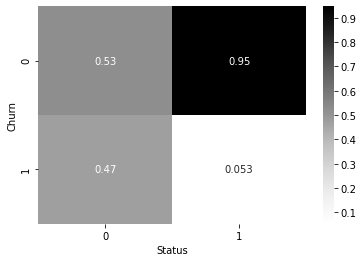

In [275]:
cont_tbl = pd.crosstab(customer_df.Churn,customer_df.Status)
prob_tbl = cont_tbl/cont_tbl.sum()
sns.heatmap(prob_tbl, annot=True, center=0.5,cmap="Greys")
plt.show()

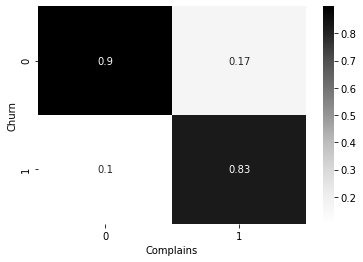

In [276]:
cont_tbl = pd.crosstab(customer_df.Churn,customer_df.Complains)
prob_tbl = cont_tbl/cont_tbl.sum()
sns.heatmap(prob_tbl, annot=True, center=0.5,cmap="Greys")
plt.show()

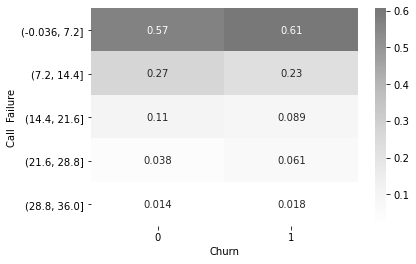

In [277]:
disc_call_failure = pd.cut(customer_df['Call  Failure'],bins=5)
cont_tbl = pd.crosstab(disc_call_failure,customer_df.Churn)
prob_tbl = cont_tbl/cont_tbl.sum()
sns.heatmap(prob_tbl, annot=True, center=0.5,cmap="Greys")
plt.show()

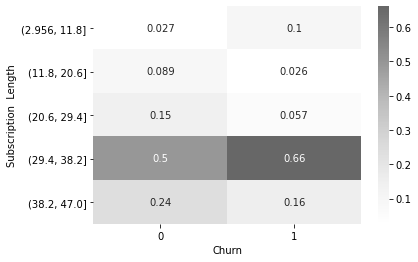

In [278]:
disc_subs_length = pd.cut(customer_df['Subscription  Length'],bins=5)
cont_tbl = pd.crosstab(disc_subs_length,customer_df.Churn)
prob_tbl = cont_tbl/cont_tbl.sum()
sns.heatmap(prob_tbl, annot=True, center=0.5,cmap="Greys")
plt.show()

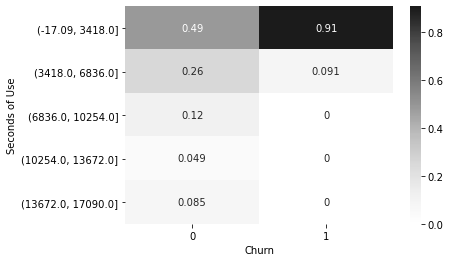

In [279]:
disc_secs_of_use = pd.cut(customer_df['Seconds of Use'],bins=5)
cont_tbl = pd.crosstab(disc_secs_of_use,customer_df.Churn)
prob_tbl = cont_tbl/cont_tbl.sum()
sns.heatmap(prob_tbl, annot=True, center=0.5,cmap="Greys")
plt.show()

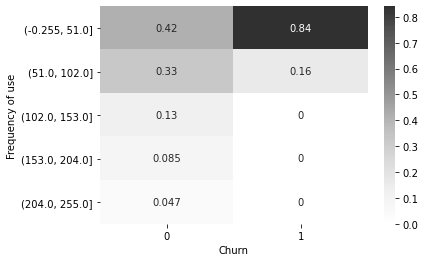

In [280]:
disc_freq_of_use = pd.cut(customer_df['Frequency of use'],bins=5)
cont_tbl = pd.crosstab(disc_freq_of_use,customer_df.Churn)
prob_tbl = cont_tbl/cont_tbl.sum()
sns.heatmap(prob_tbl, annot=True, center=0.5,cmap="Greys")
plt.show()

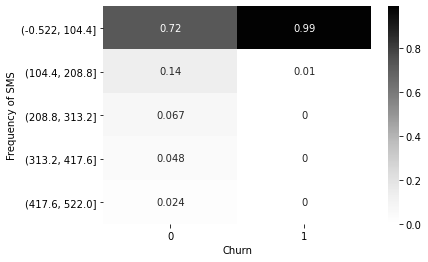

In [281]:
disc_freq_of_sms = pd.cut(customer_df['Frequency of SMS'],bins=5)
cont_tbl = pd.crosstab(disc_freq_of_sms,customer_df.Churn)
prob_tbl = cont_tbl/cont_tbl.sum()
sns.heatmap(prob_tbl, annot=True, center=0.5,cmap="Greys")
plt.show()

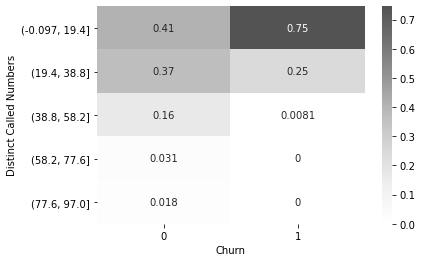

In [282]:
disc_called_num = pd.cut(customer_df['Distinct Called Numbers'],bins=5)
cont_tbl = pd.crosstab(disc_called_num,customer_df.Churn)
prob_tbl = cont_tbl/cont_tbl.sum()
sns.heatmap(prob_tbl, annot=True, center=0.5,cmap="Greys")
plt.show()

c. Use the visuals in b, to describe the relationship each of the attributes has with the attribute price.

Churn and Status. Strong relation to status active(1) and churn(0)
Churn and Complains: Strong relation when no complains and no churn and Complains and churn.
Churn and call failure: Doesn't have a relation (very small)
Churn and subcription length: Doesn't have a relation (very small)
Churn and seconds of use: shorter use have a strong relation to churn.
Churn and frequency of use: Smaller frequency of use have strong relation to churn.
Churn and frequency of SMS: Smaller frequency of SMS have strong relation to churn.
Churn and distinct called numbers: Smaller distinct called numbers have a strong relation to churn

d. Perform KNN to predict if the aforementioned customer will be churned using all of the attributes that had a meaningful relationship with churn.

Using the above data, we would like to use this dataset to predict if the following customer will churn in three months. Call Failures: 8, Complains: 1, Subscription Length: 40, Seconds of Use: 4472, Frequency of use: 70, Frequency of SMS: 100, Distinct Called Numbers: 25, Status: 1

In [283]:
from sklearn.neighbors import KNeighborsClassifier

def knnClassify(knum):
#Normalize numerical columns
    c_to_normalize =['Call  Failure', 'Subscription  Length', 'Seconds of Use',
           'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers']
    for c in c_to_normalize:
        customer_df["nor_"+ c] = (customer_df[c]- customer_df[c].min())/(customer_df[c].max() -customer_df[c].min())

    #add the categorical columns to predictors 
    #nor_customer_df['Status'] = customer_df['Status']
    #nor_customer_df['Complains'] = customer_df['Complains']

    predictors = ['nor_Call  Failure', 'nor_Subscription  Length',
           'nor_Seconds of Use', 'nor_Frequency of use', 'nor_Frequency of SMS',
           'nor_Distinct Called Numbers','Status','Complains']

    target = 'Churn'

    Xs = customer_df[predictors]
    y= customer_df[target]

    knn = KNeighborsClassifier(n_neighbors=knum)
    knn.fit(Xs, y)

    #customer info to predict
    new_cust_df = pd.DataFrame({'Call  Failure':8,'Complains':1,'Subscription  Length':40,
                             'Seconds of Use':4472,'Frequency of use':70,
                          'Frequency of SMS':100,'Distinct Called Numbers':25,'Status':1},index=[0])


    #need to normalize the new_cust_df to predict as well, min and max from customer_df
    #and put into nor_new_cust_df

    nor_new_cust_df = pd.DataFrame()
    for c in c_to_normalize:
        nor_new_cust_df["nor_"+ c] = (new_cust_df[c]- customer_df[c].min())/(customer_df[c].max() -customer_df[c].min())
    nor_new_cust_df['Status'] = new_cust_df['Status']
    nor_new_cust_df['Complains'] = new_cust_df['Complains']

    predict_y = knn.predict(nor_new_cust_df)
    return(predict_y)


In [286]:
# call the classifier
ret = knnClassify(4)
if(ret == 1):
    print("Churned")
else:
    print("Not churned")

Churned


e. Repeat d, but this time use K=10. Are the conclusions different?

In [287]:
ret = knnClassify(10)
if(ret == 1):
    print("Churned")
else:
    print("Not churned")

Churned


Conclusion is the same with K=4 and K=10. 
Customer complains seems to be the main predictor. I tried the new data with Complains:0 and then it is not churned.
I could have reduce the predictors and also train the model to be more efficient.

f. Now use the Decision Tree for classification. Is the conclusion of the Decision Tree different from that of the KNN?

In [422]:
from sklearn.tree import DecisionTreeClassifier
predictors =  ['Complains','Status']
target = 'Churn'
Xs = customer_df[predictors]
y= customer_df[target]

classTree = DecisionTreeClassifier()
classTree.fit(Xs, y)

new_cust_df = pd.DataFrame({'Complains':1,'Status':1},index=[0])
predict_y = classTree.predict(new_cust_df)
print(predict_y)

[1]


Decison tree also showed this customer as Churned (1). I used only two strong predictors so the tree below is not complex.

g. Draw the tree-like structure of the Decision Tree and explain how the Decision Tree came to the conclusion it did. 

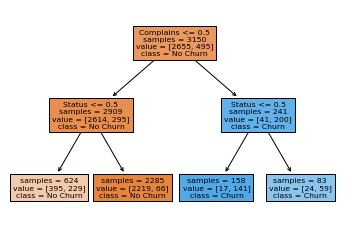

In [423]:
from sklearn.tree import plot_tree
plot_tree(classTree,
          feature_names=predictors,
          class_names = ['No Churn','Churn'],
          filled=True,impurity=False)
plt.show()

Starting from top root node, it checks if the 'Complains' less than 0.5, if it is, it decides it is Not Churned. in our case it is 1, so it checks 'Status' on the right branch in the next level, if 'Status is less than 0.5 or not it decides it is churned (bottom right leaf nodes).

If 'Complain' was 0 then it would go to the left branch (Not Churned) and check the 'Status' and it would end up at not churned.

## Chapter 08: Clustering

Unlike the previous two chapters, Chapter 08 covers an unsuppervised learning technique to idenify groups within a dataset. These groups are called "clusters" and the technique is called "clustering." This is a great way to identify observations that are similar to each other based on the values of select attributes. Humans are pretty good at identifying clusters in 2d data through visualizations, but the techniques explored in this chapter can identify clusters in multiple dimensions.

### Exercise 3
In this chapter, we used WH Report_preprocessed.csv to form meaningful clusters of countries only using 2019 data. In this exercise, we want to use the data of all the years 2010-2019. Perform the following steps to do this.

a. Use a .pivot() function to restructure the data so each combination of year and happiness index has a column. In other words, the data of the year is recorded in the long format and we would like to change that into the wide format. We will not need the columns population and Continent. 

In [471]:
report_df = pd.read_csv('WH Report_preprocessed.csv')
report_df.drop(columns=['Continent','population'],inplace=True)
report_df.head()


,Name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
1,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
2,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
3,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
4,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375


In [472]:
pvt_df=report_df.pivot(index='Name',columns='year')
pvt_df.head()

Life_Ladder                                                   \
year               2010   2011   2012   2013   2014   2015   2016   2017   
Name                                                                       
Afghanistan       4.758  3.832  3.783  3.572  3.131  3.983  4.220  2.662   
Albania           5.269  5.867  5.510  4.551  4.814  4.607  4.511  4.640   
Algeria           5.464  5.317  5.605  5.980  6.355  5.848  5.341  5.249   
Argentina         6.441  6.776  6.468  6.582  6.671  6.697  6.427  6.039   
Armenia           4.368  4.260  4.320  4.277  4.453  4.348  4.325  4.288   

                           ... Negative_affect                               \
year          2018   2019  ...            2010   2011   2012    2013   2014   
Name                       ...                                                
Afghanistan  2.694  2.375  ...           0.275  0.267  0.268  0.2730  0.375   
Albania      5.004  4.995  ...           0.300  0.257  0.271  0.3380  0.335   
Algeria      5.043  4.745  ...           0.255  0.255  0.230  0.2035  0.177   
Argentina    5.793  6.086  ...           0.211  0.232  0.272  0.2540  0.238   
Armenia      5.062  5.488  ...           0.426  0.459  0.464  0.4500  0.404   

                                                
year          2015   2016   2017   2018   2019  
Name                                            
Afghanistan  0.339  0.348  0.371  0.405  0.502  
Albania      0.350  0.322  0.334  0.319  0.274  
Algeria      0.277  0.377  0.289  0.293  0.215  
Argentina    0.305  0.312  0.292  0.321  0.319  
Armenia      0.438  0.437  0.437  0.455  0.430  

[5 rows x 90 columns]

b. Normalize pvt_df and assign into Xs.

In [473]:
dimensions = pvt_df.columns
Xs = pvt_df[dimensions]
Xs = (Xs - Xs.min())/(Xs.max()-Xs.min())

c. Use K-means and Xs to find 3 clusters among the data objects. Report the members of each cluster. 

In [479]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xs)
for i in range(3):
    BM = kmeans.labels_==i
    print('Cluster {}: {}' .format(i,pvt_df[BM].index))

Cluster 0: Index(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Canada', 'Costa Rica',
       'Denmark', 'Finland', 'France', 'Germany', 'Iceland', 'Ireland',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Singapore', 'Sweden', 'Switzerland', 'Thailand',
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Uzbekistan'],
      dtype='object', name='Name')
Cluster 1: Index(['Afghanistan', 'Armenia', 'Bangladesh', 'Benin', 'Botswana',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Chad', 'Ethiopia', 'Gabon',
       'Georgia', 'Ghana', 'Guinea', 'Haiti', 'India', 'Iraq', 'Kenya',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Morocco',
       'Myanmar', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Tajikistan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda',
       'Zambia', 'Zimbabwe'],
      dtype='object', name='Name')
Cluster 2: Index(['Albania', 'Algeria', 'Arg

d. Use a heatmap to perform centroid analysis. As the number of columns is many for this clustering, you may have to resize the heatmap bigger so you can use it for analysis. Make sure you’ve given a name to each cluster.  

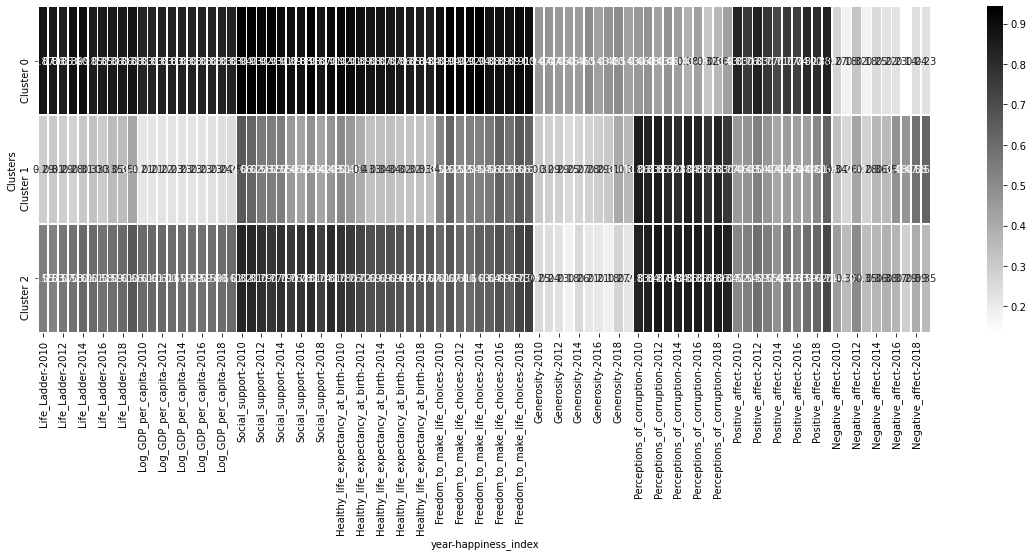

In [487]:
import seaborn as sns
plt.figure(figsize=(20, 6))
clusters = ['Cluster {}'.format(i) for i in range(3)]
Centroids = pd.DataFrame(0.0, index = clusters, columns =
Xs.columns)
for i,clst in enumerate(clusters):
    BM = kmeans.labels_==i
    Centroids.loc[clst] = Xs[BM].median(axis=0)
sns.heatmap(Centroids, linewidths=.5, annot=True,
cmap='binary')
plt.xlabel('year-happiness_index')
plt.ylabel('Clusters')
plt.show()

Cluster 0 seems to have higher scores for life ladder, GDP, social support, healty life and freedom to make choices so this cluster can be named happy_people. Cluster 1 is high values in corruption so we can name it unhappy_underhand. Cluster 2 also hgh in corruption but has some higher numbers in social support, healty life and freedom to make choices, so cluster 2 can be called happy_underhand